In [1]:
import lightning as L
import torch
from shared_utilities import PyTorchMLP, LightningModel, MNISTDataModule
from lightning.pytorch.loggers import CSVLogger

import pandas as pd
import matplotlib.pyplot as plt

## Training

In [2]:
torch.manual_seed(123)

dm = MNISTDataModule()

pytorch_model = PyTorchMLP(num_features=784, num_classes=10)

lightning_model = LightningModel(model=pytorch_model, learning_rate=0.08)

trainer = L.Trainer(
    max_epochs=15,
    accelerator="cpu",
    devices="auto",
    logger=CSVLogger(save_dir="logger/", name="my-model"), ### NEW
    deterministic=True,
)

trainer.fit(model=lightning_model, datamodule=dm)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\hazru\miniconda3\envs\dl\lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:612: UserWarning: Checkpoint directory logger/my-model\version_0\checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 40.8 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
40.8 K    Trainable params
0         Non-trainable params
40.8 K    Total params
0.163     Total estimated model params size (MB)
c:\Users\hazru\miniconda3\envs\dl\lib\site-packages\lightning\fabric\loggers\csv_logs.py:188: UserWarning: Experiment logs 

c:\Users\hazru\miniconda3\envs\dl\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\hazru\miniconda3\envs\dl\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 14: 100%|██████████| 859/859 [00:25<00:00, 34.21it/s, v_num=0, val_loss=0.101, val_acc=0.970, train_acc=0.987] 

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 859/859 [00:25<00:00, 34.19it/s, v_num=0, val_loss=0.101, val_acc=0.970, train_acc=0.987]


## Model Performance

In [3]:
trainer.logger.log_dir

'logger/my-model\\version_0'

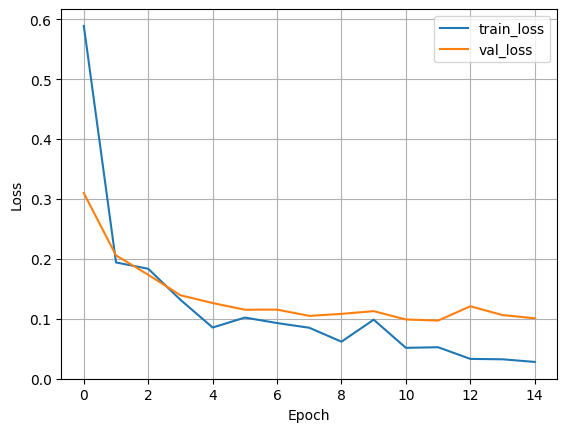

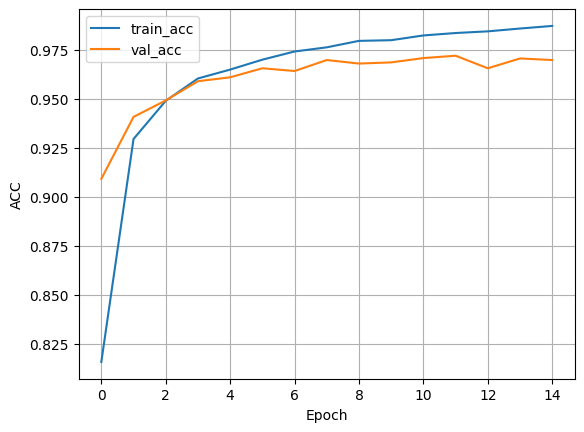

In [4]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

aggreg_metrics = []
agg_col = "epoch"
for i, dfg in metrics.groupby(agg_col):
    agg = dict(dfg.mean())
    agg[agg_col] = i
    aggreg_metrics.append(agg)

df_metrics = pd.DataFrame(aggreg_metrics)
df_metrics[["train_loss", "val_loss"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)
df_metrics[["train_acc", "val_acc"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="ACC"
)

plt.show()

In [5]:
trainer.save_checkpoint("model.ckpt")